## 0.0. Instalando e Importando Bibliotecas Necessárias

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import joblib


### 0.1. Carregando os dados

In [32]:
df = pd.read_csv('netflix_customer_churn.csv')
df.head()


,customer_id,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
0,a9b75100-82a8-427a-a208-72f24052884a,51,Other,Basic,14.73,29,Africa,TV,8.99,1,Gift Card,1,0.49,Action
1,49a5dfd9-7e69-4022-a6ad-0a1b9767fb5b,47,Other,Standard,0.70,19,Europe,Mobile,13.99,1,Gift Card,5,0.03,Sci-Fi
2,4d71f6ce-fca9-4ff7-8afa-197ac24de14b,27,Female,Standard,16.32,10,Asia,TV,13.99,0,Crypto,2,1.48,Drama
3,d3c72c38-631b-4f9e-8a0e-de103cad1a7d,53,Other,Premium,4.51,12,Oceania,TV,17.99,1,Crypto,2,0.35,Horror
4,4e265c34-103a-4dbb-9553-76c9aa47e946,56,Other,Standard,1.89,13,Africa,Mobile,13.99,1,Crypto,2,0.13,Action


## 1.0. Análise Exploratória dos Dados

### 1.1. Verificar informações gerais do dataframe

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             5000 non-null   object 
 1   age                     5000 non-null   int64  
 2   gender                  5000 non-null   object 
 3   subscription_type       5000 non-null   object 
 4   watch_hours             5000 non-null   float64
 5   last_login_days         5000 non-null   int64  
 6   region                  5000 non-null   object 
 7   device                  5000 non-null   object 
 8   monthly_fee             5000 non-null   float64
 9   churned                 5000 non-null   int64  
 10  payment_method          5000 non-null   object 
 11  number_of_profiles      5000 non-null   int64  
 12  avg_watch_time_per_day  5000 non-null   float64
 13  favorite_genre          5000 non-null   object 
dtypes: float64(3), int64(4), object(7)
memor

### 1.2. Verificar valores ausentes

In [34]:
df.isnull().sum()

,0
customer_id,0
age,0
gender,0
subscription_type,0
watch_hours,0
last_login_days,0
region,0
device,0
monthly_fee,0
churned,0


### 1.3. Verificar estatísticas descritivas

In [35]:
df.describe()

,age,watch_hours,last_login_days,monthly_fee,churned,number_of_profiles,avg_watch_time_per_day
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,43.847400,11.649450,30.089800,13.683400,0.503000,3.024400,0.874800
std,15.501128,12.014654,17.536078,3.692062,0.500041,1.415841,2.619824
min,18.000000,0.010000,0.000000,8.990000,0.000000,1.000000,0.000000
25%,30.000000,3.337500,15.000000,8.990000,0.000000,2.000000,0.110000
50%,44.000000,8.000000,30.000000,13.990000,1.000000,3.000000,0.290000
75%,58.000000,16.030000,45.000000,17.990000,1.000000,4.000000,0.720000
max,70.000000,110.400000,60.000000,17.990000,1.000000,5.000000,98.420000


### 1.4. Visualizar a distribuição das variáveis numéricas

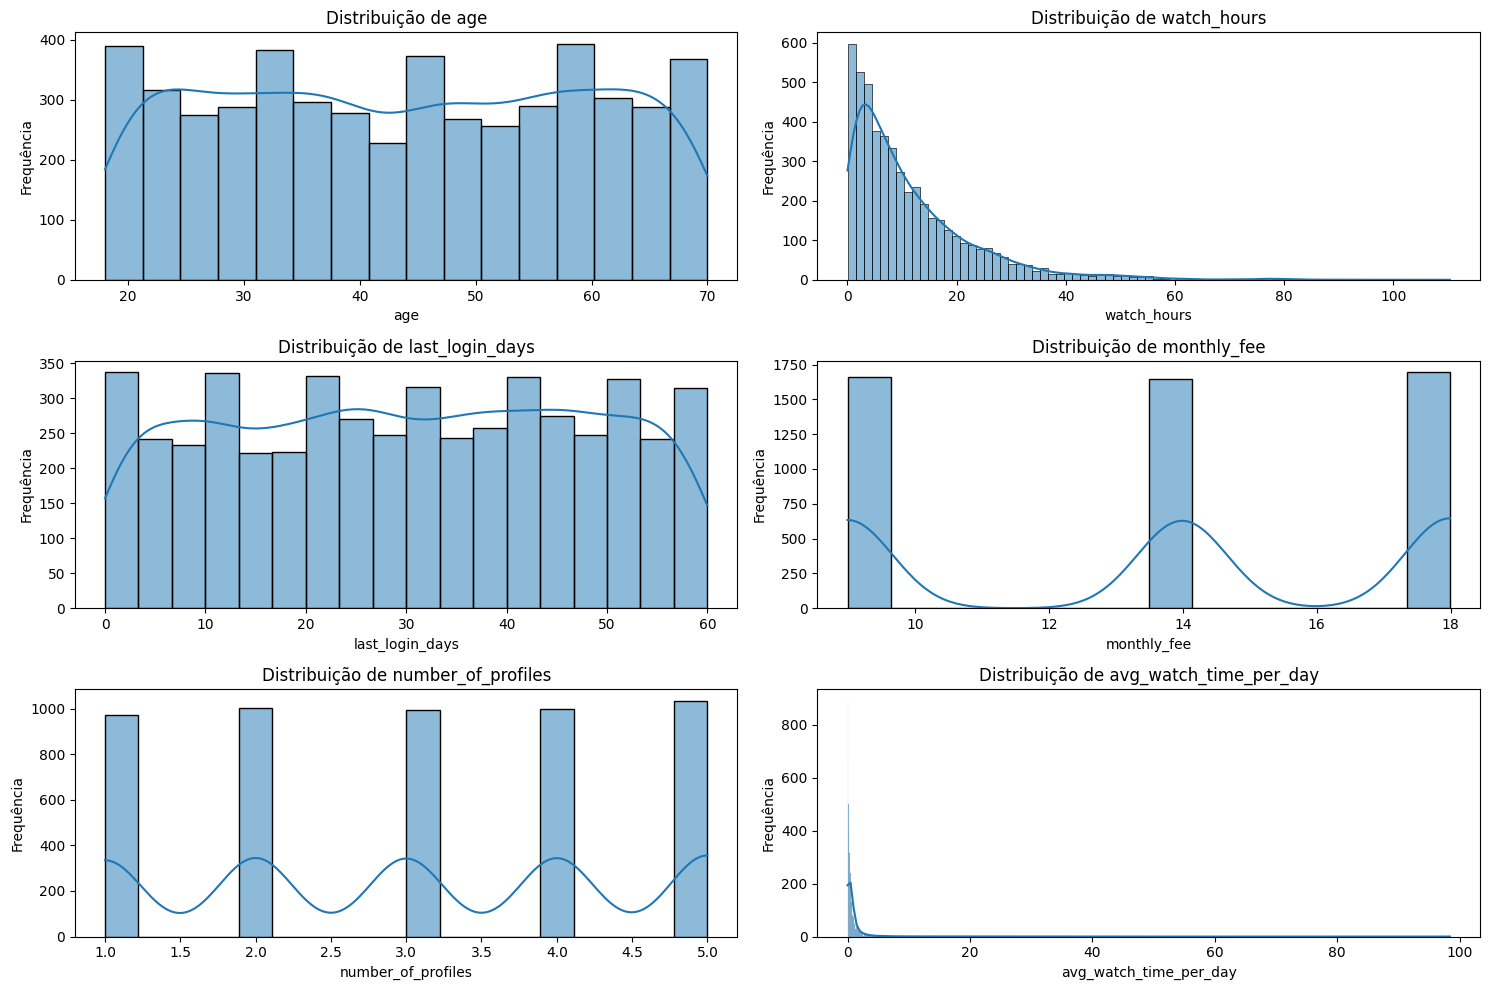

In [36]:
colunas_numericas = ['age', 'watch_hours', 'last_login_days', 'monthly_fee', 'number_of_profiles', 'avg_watch_time_per_day']

plt.figure(figsize=(15, 10))
for i, col in enumerate(colunas_numericas, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribuição de {col}')
    plt.xlabel(col)
    plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

### 1.5. Visualizar a distribuição das variáveis categóricas

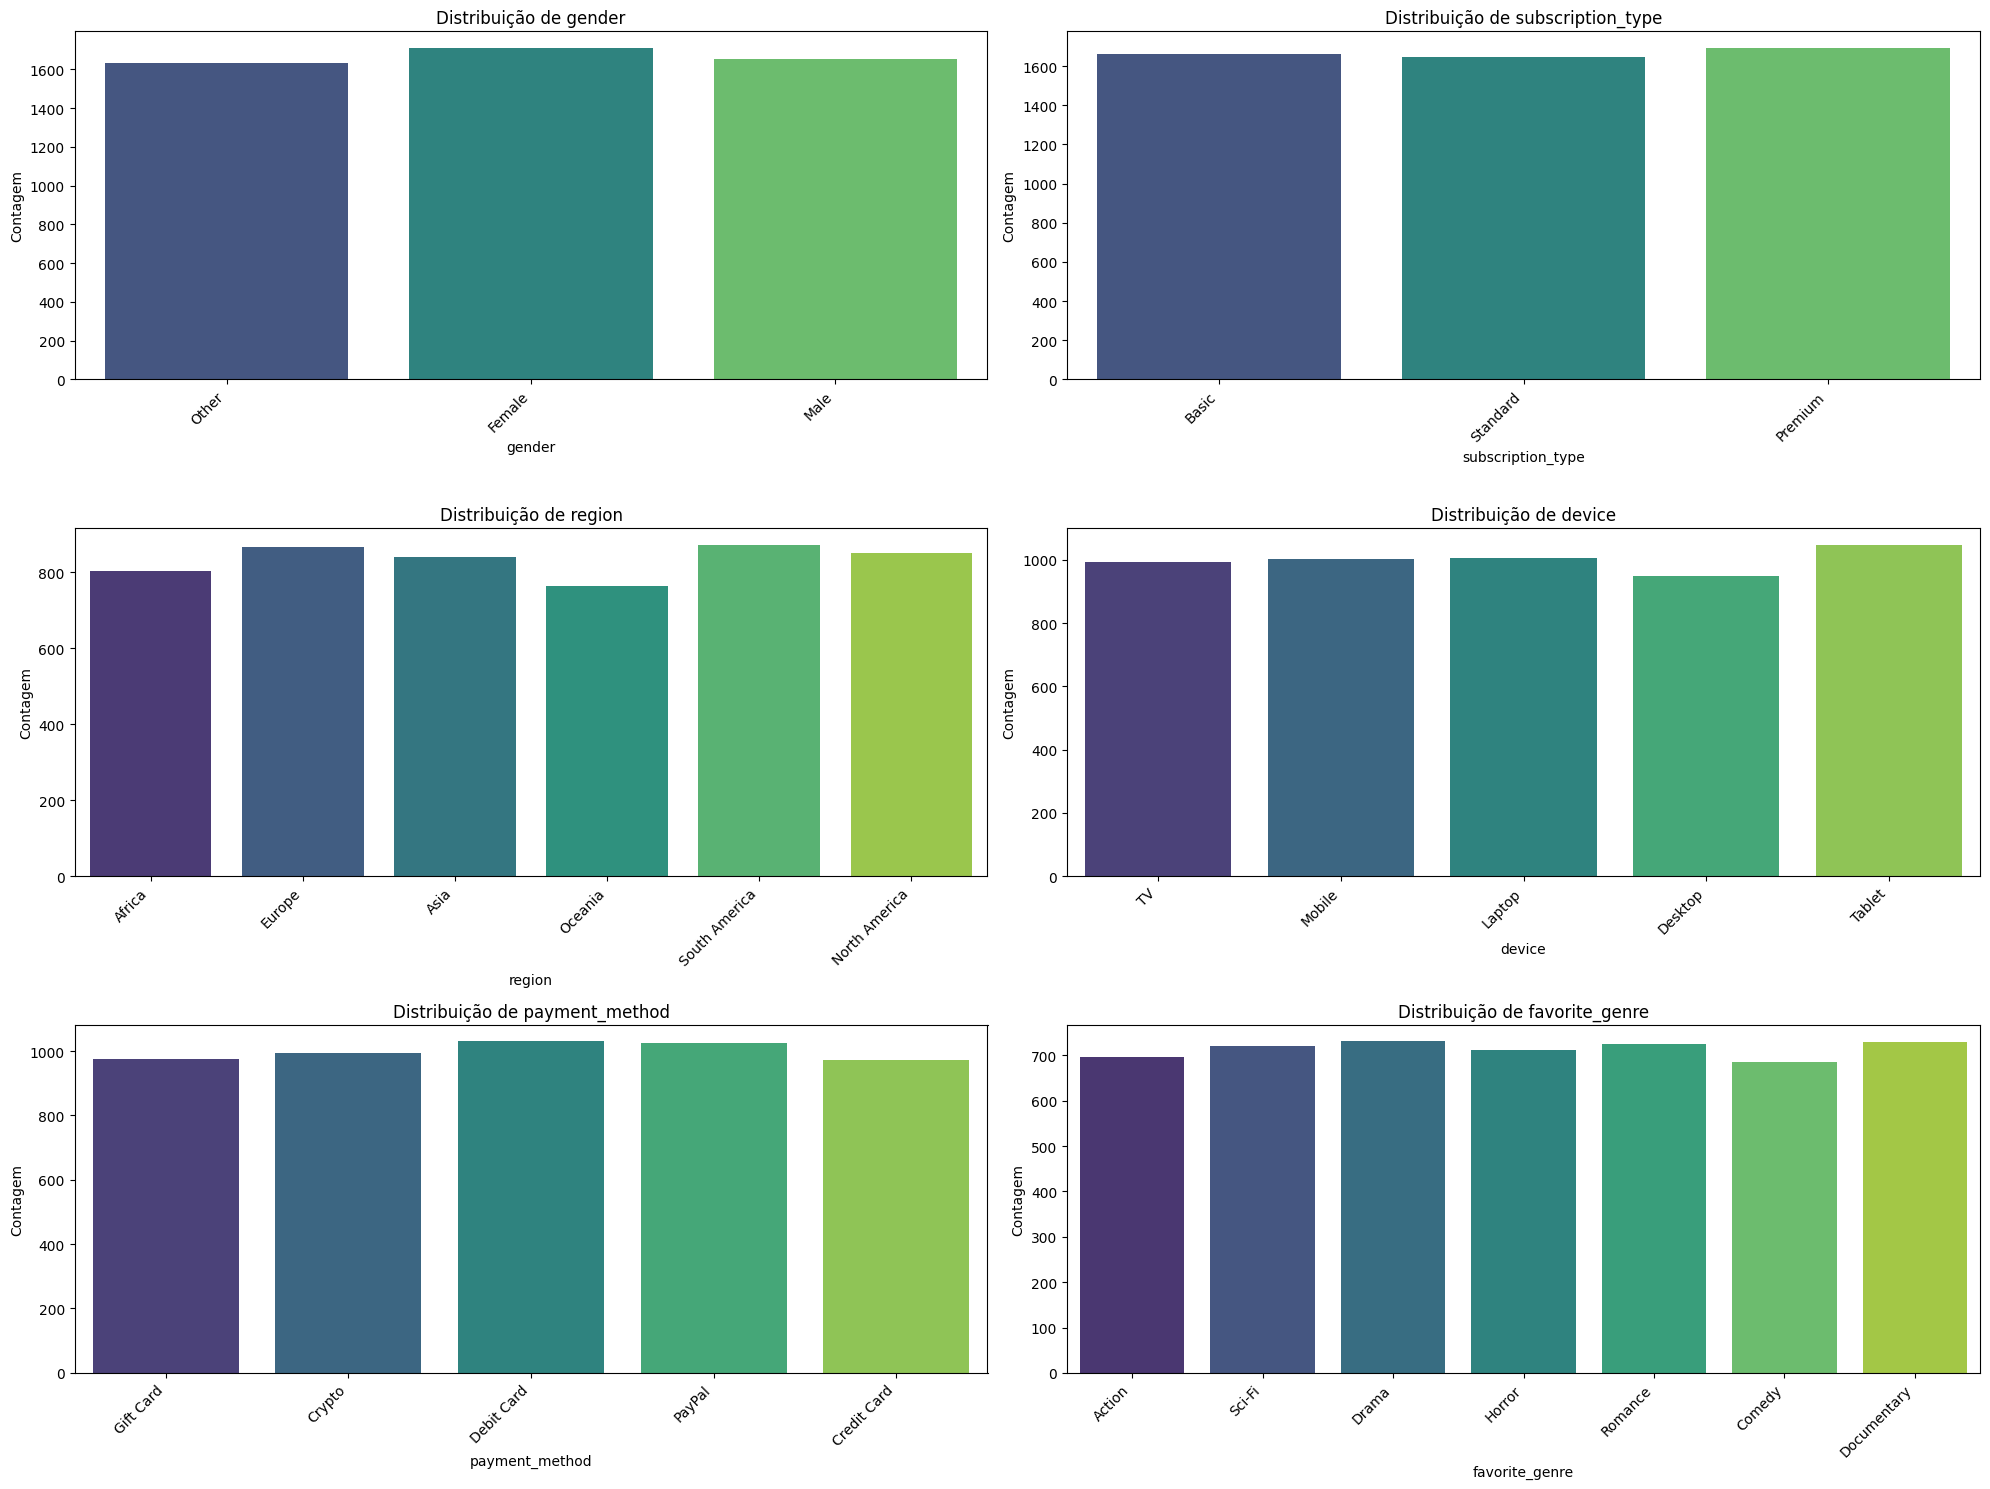

In [37]:
colunas_categoricas = ['gender', 'subscription_type', 'region', 'device', 'payment_method', 'favorite_genre']

plt.figure(figsize=(20, 15))
for i, col in enumerate(colunas_categoricas, 1):
    plt.subplot(3, 2, i)
    sns.countplot(data=df, x=col, hue=col, palette='viridis', legend=False)
    plt.title(f'Distribuição de {col}')
    plt.xlabel(col)
    plt.ylabel('Contagem')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 1.6. Analisar a relação entre variáveis categóricas e churn

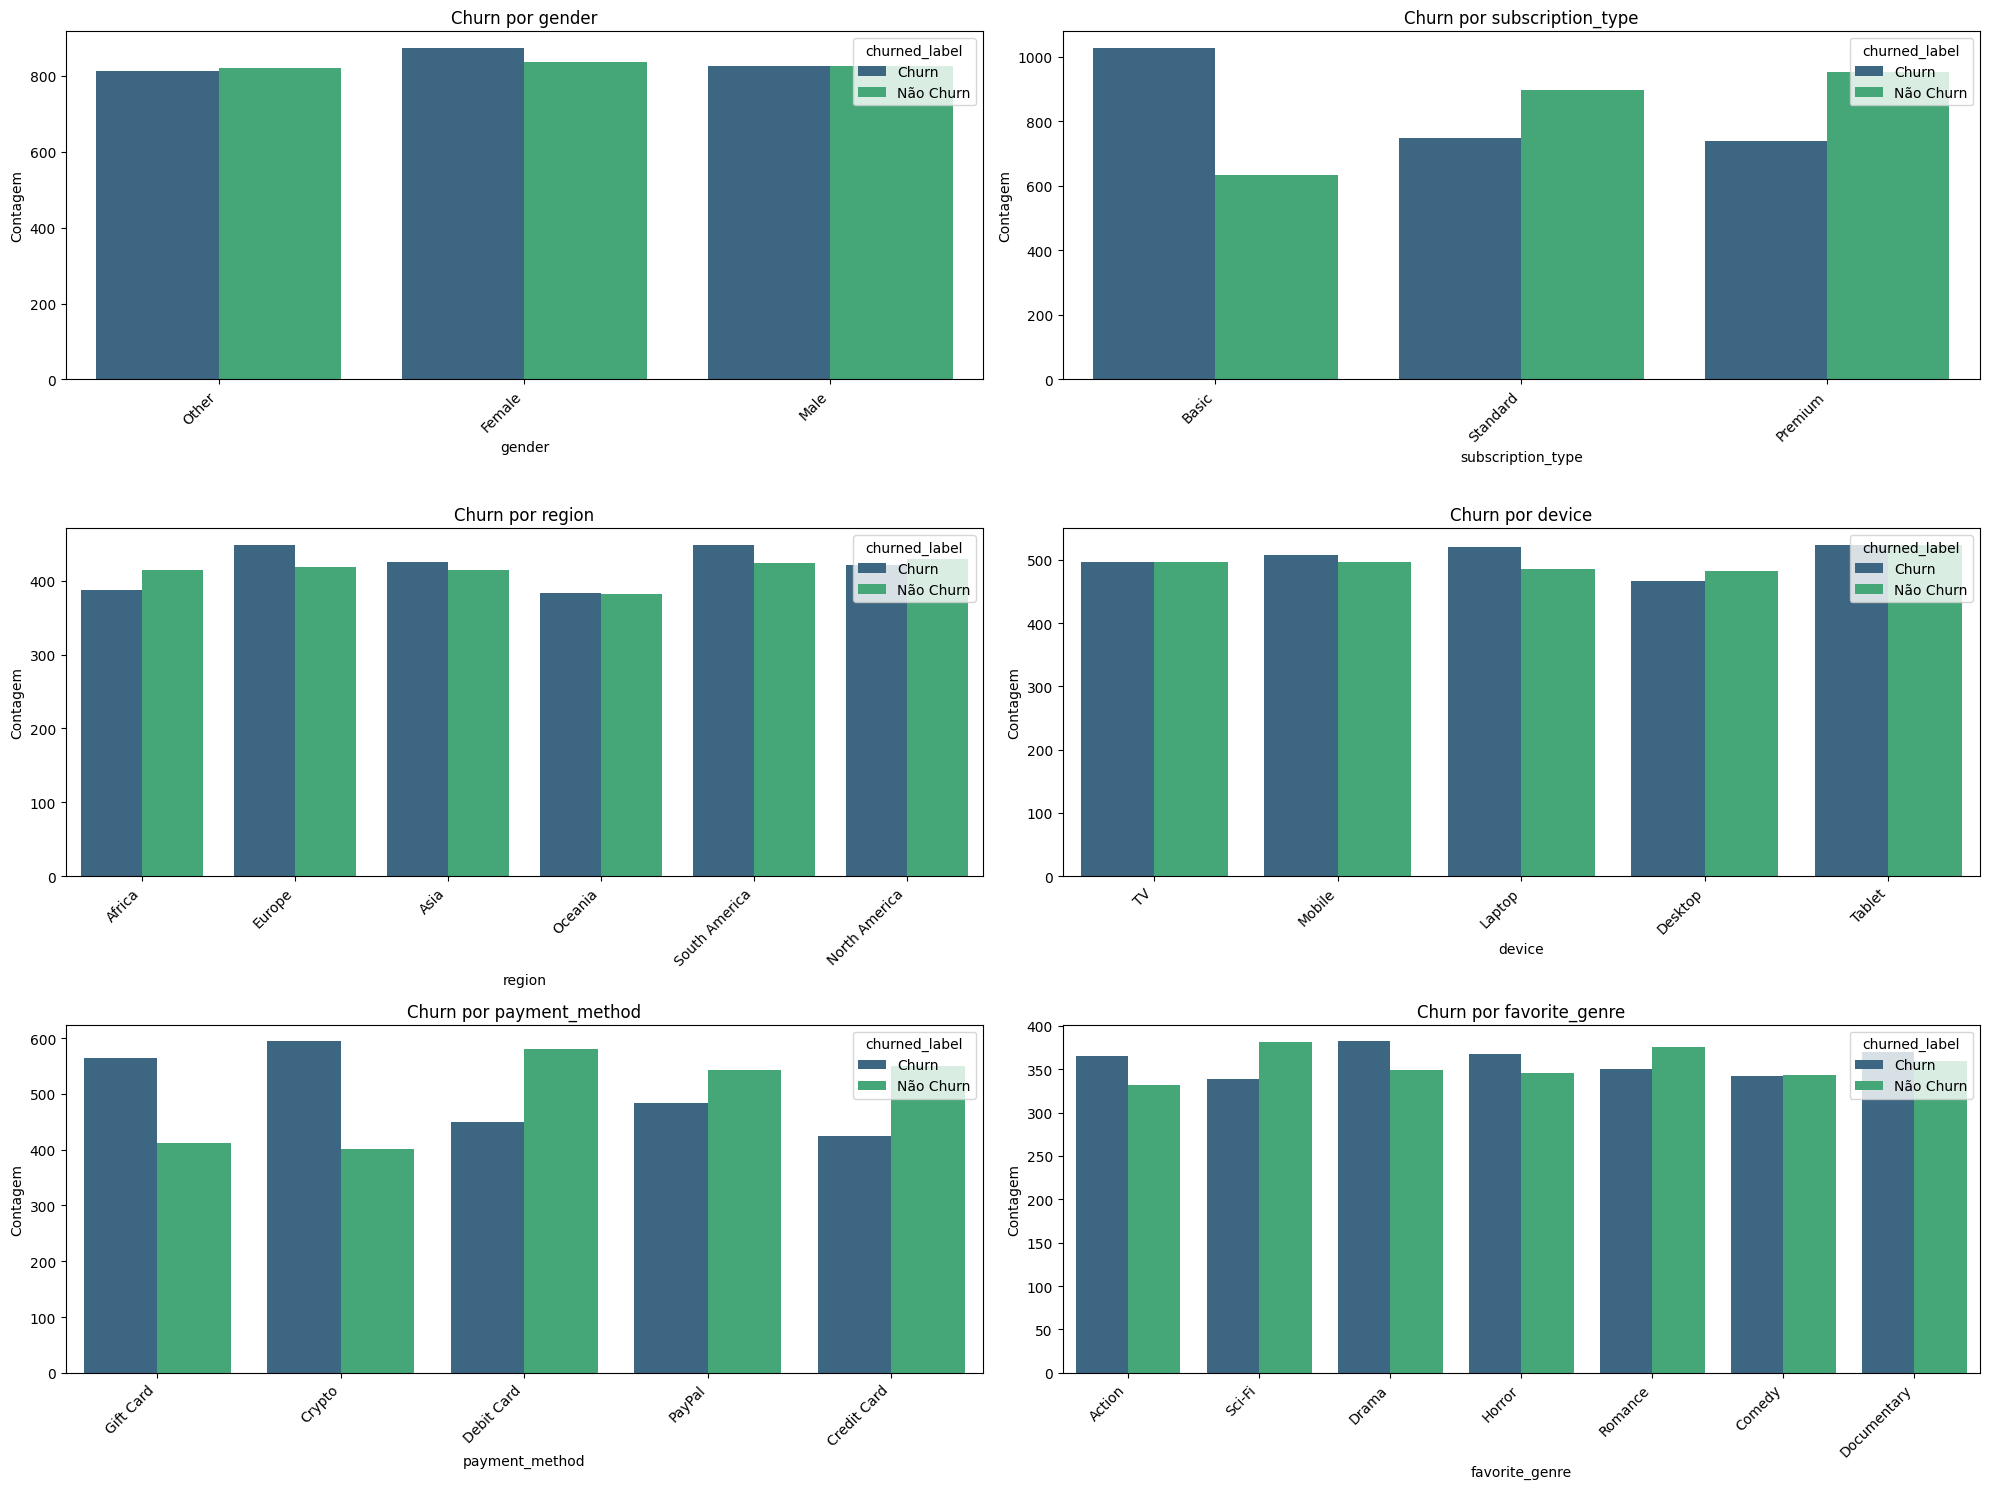

In [38]:
df['churned_label'] = df['churned'].map({0: 'Não Churn', 1: 'Churn'})

colunas_categoricas = ['gender', 'subscription_type', 'region', 'device', 'payment_method', 'favorite_genre']

plt.figure(figsize=(20, 15))
for i, col in enumerate(colunas_categoricas, 1):
    plt.subplot(3, 2, i)
    sns.countplot(data=df, x=col, hue='churned_label', palette='viridis') # Usando 'churned_label' aqui
    plt.title(f'Churn por {col}')
    plt.xlabel(col)
    plt.ylabel('Contagem')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 1.7. Analisar a relação entre variáveis numéricas e churn

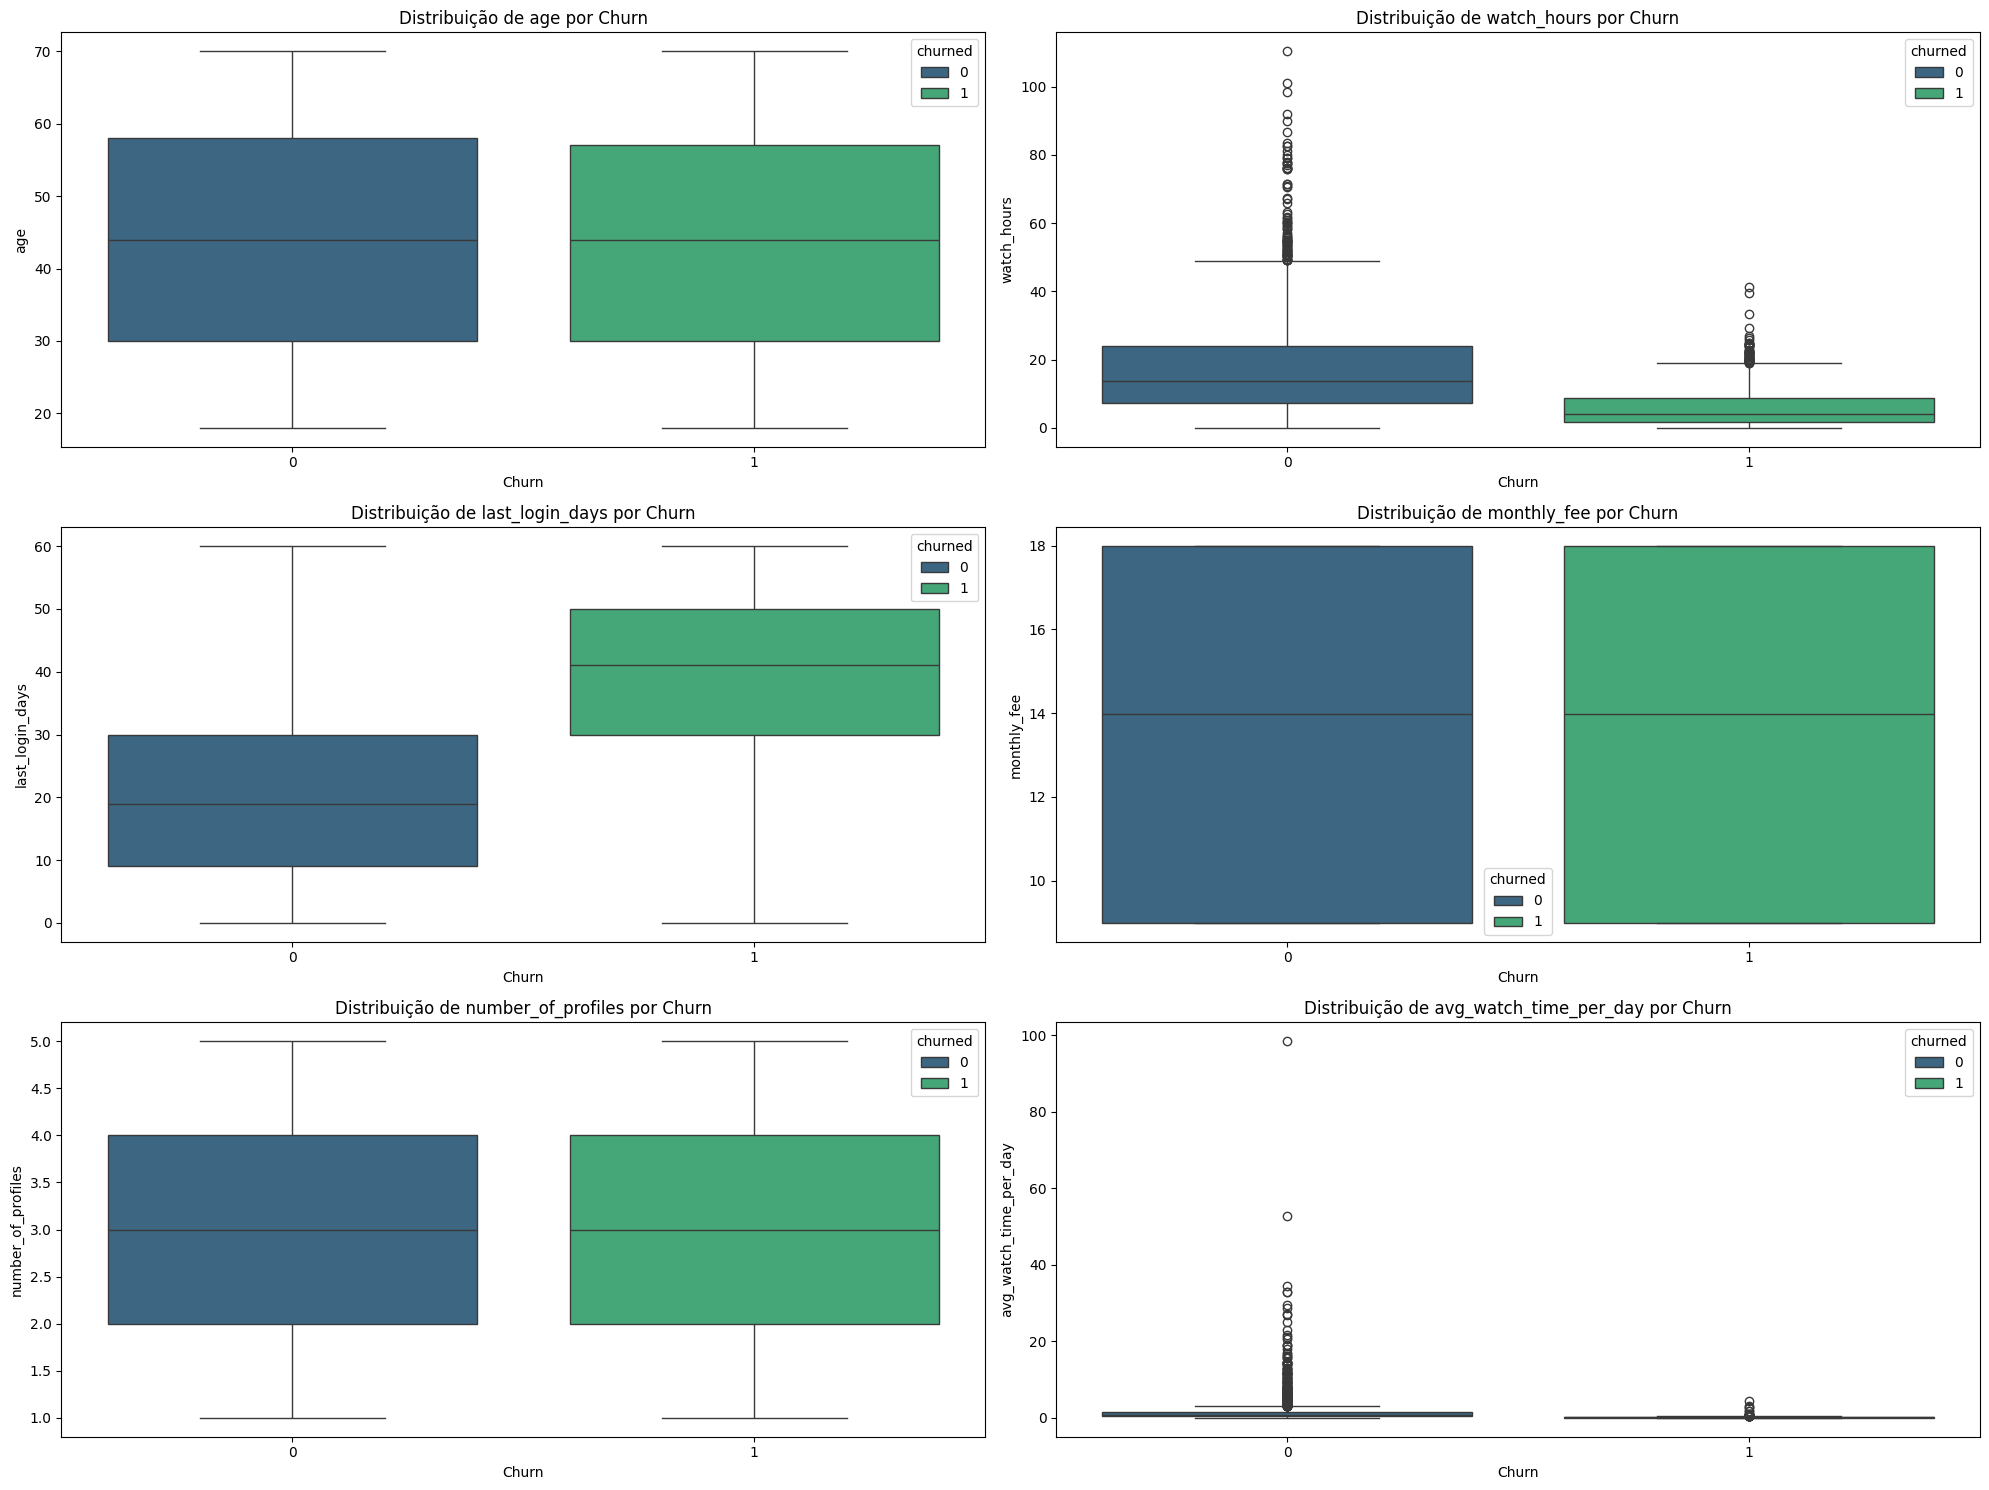

In [39]:
colunas_numericas = ['age', 'watch_hours', 'last_login_days', 'monthly_fee', 'number_of_profiles', 'avg_watch_time_per_day']

plt.figure(figsize=(20, 15))
for i, col in enumerate(colunas_numericas, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(data=df, x='churned', y=col, hue='churned', palette='viridis') # Adicionado hue='churned' para resolver o FutureWarinig e manter a legenda 0 e 1
    plt.title(f'Distribuição de {col} por Churn')
    plt.xlabel('Churn')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

### 1.8. Análise de Correlação

In [40]:
colunas_numericas_com_churn = ['age', 'watch_hours', 'last_login_days', 'monthly_fee', 'number_of_profiles', 'avg_watch_time_per_day', 'churned']
correlation_matrix = df[colunas_numericas_com_churn].corr()
print(correlation_matrix)

                             age  watch_hours  last_login_days  monthly_fee  \
age                     1.000000     0.031539         0.016769    -0.013943   
watch_hours             0.031539     1.000000         0.001697     0.004960   
last_login_days         0.016769     0.001697         1.000000    -0.000789   
monthly_fee            -0.013943     0.004960        -0.000789     1.000000   
number_of_profiles      0.017333     0.016528         0.017242     0.021905   
avg_watch_time_per_day  0.010355     0.349742        -0.338418    -0.010401   
churned                -0.003515    -0.479916         0.471590    -0.152117   

                        number_of_profiles  avg_watch_time_per_day   churned  
age                               0.017333                0.010355 -0.003515  
watch_hours                       0.016528                0.349742 -0.479916  
last_login_days                   0.017242               -0.338418  0.471590  
monthly_fee                       0.021905         

### 1.9. Visualização da Matriz de Correlação

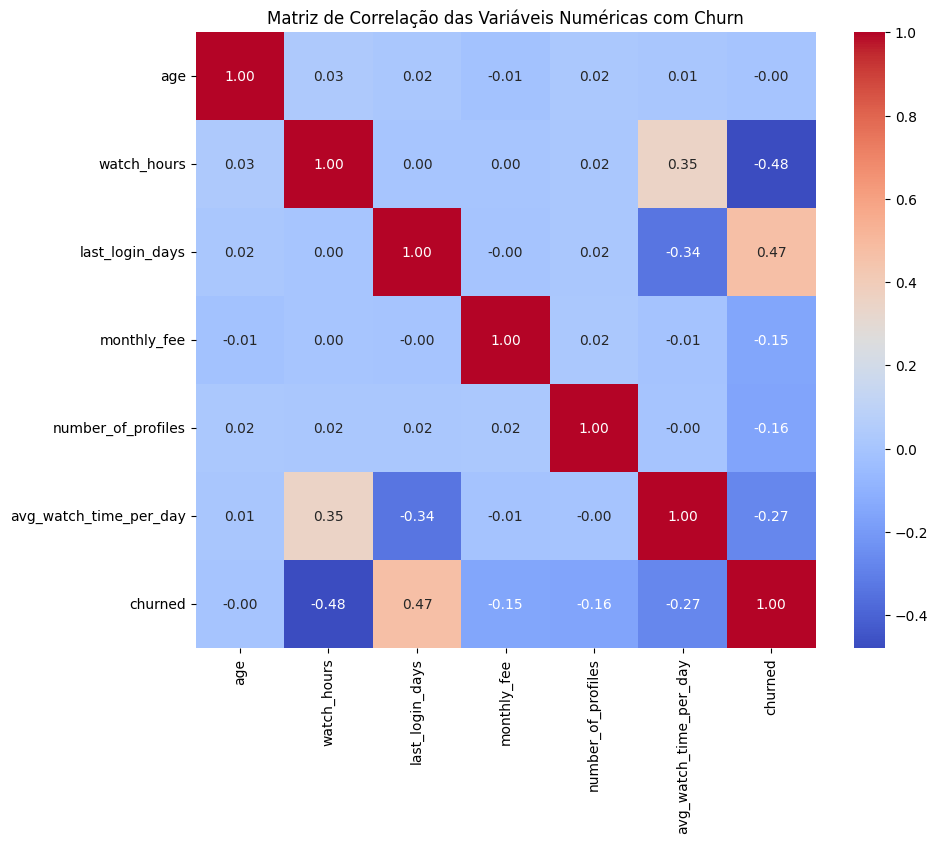

In [41]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação das Variáveis Numéricas com Churn')
plt.show()

## 2.0. Preparação dos Dados para Modelagem

### 2.1. Divisão de Features e Target

In [42]:
# Separando features (X) e target (y)
X = df.drop(['customer_id', 'churned', 'churned_label'], axis=1)
y = df['churned']

#Conferindo dimensões
print("Dimensão de X:", X.shape)
print("Dimensão de y:", y.shape)

# Visualizando amostras
print("\nAs 5 primeiras linhas de X:")
print(X.head())
print("\nOs 5 primeiros valores de y:")
print(y.head())

Dimensão de X: (5000, 12)
Dimensão de y: (5000,)

As 5 primeiras linhas de X:
   age  gender subscription_type  watch_hours  last_login_days   region  \
0   51   Other             Basic        14.73               29   Africa   
1   47   Other          Standard         0.70               19   Europe   
2   27  Female          Standard        16.32               10     Asia   
3   53   Other           Premium         4.51               12  Oceania   
4   56   Other          Standard         1.89               13   Africa   

   device  monthly_fee payment_method  number_of_profiles  \
0      TV         8.99      Gift Card                   1   
1  Mobile        13.99      Gift Card                   5   
2      TV        13.99         Crypto                   2   
3      TV        17.99         Crypto                   2   
4  Mobile        13.99         Crypto                   2   

   avg_watch_time_per_day favorite_genre  
0                    0.49         Action  
1                 

### 2.2. Identificação de Variáveis Categóricas e Numéricas

In [43]:
colunas_numericas_X = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
colunas_categoricas_X = X.select_dtypes(include=['object', 'category']).columns.tolist()

print("Colunas Numéricas em X:", colunas_numericas_X)
print("Colunas Categóricas em X:", colunas_categoricas_X)

Colunas Numéricas em X: ['age', 'watch_hours', 'last_login_days', 'monthly_fee', 'number_of_profiles', 'avg_watch_time_per_day']
Colunas Categóricas em X: ['gender', 'subscription_type', 'region', 'device', 'payment_method', 'favorite_genre']


### 2.3. Codificação de Variáveis Categóricas

Aplicar uma técnica de codificação (One-Hot Encoding) nas variáveis categóricas.

In [44]:
# Instanciar OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Aplicar One-Hot Encoding às colunas categóricas
X_encoded = encoder.fit_transform(X[colunas_categoricas_X])

# Criar um DataFrame a partir dos dados codificados
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(colunas_categoricas_X), index=X.index)

# Concatenar com as colunas numéricas para formar o X_processed final
X_processed = pd.concat([X[colunas_numericas_X], X_encoded_df], axis=1)

# Exibir as 5 primeiras linhas de X_processed e suas dimensões
print("As 5 primeiras linhas de X_processed:")
print(X_processed.head())
print("\nDimensão de X_processed:", X_processed.shape)

As 5 primeiras linhas de X_processed:
   age  watch_hours  last_login_days  monthly_fee  number_of_profiles  \
0   51        14.73               29         8.99                   1   
1   47         0.70               19        13.99                   5   
2   27        16.32               10        13.99                   2   
3   53         4.51               12        17.99                   2   
4   56         1.89               13        13.99                   2   

   avg_watch_time_per_day  gender_Female  gender_Male  gender_Other  \
0                    0.49            0.0          0.0           1.0   
1                    0.03            0.0          0.0           1.0   
2                    1.48            1.0          0.0           0.0   
3                    0.35            0.0          0.0           1.0   
4                    0.13            0.0          0.0           1.0   

   subscription_type_Basic  ...  payment_method_Debit Card  \
0                      1.0  ...   

### 2.4. Escalonamento de Variáveis Numéricas

Aplicar um escalonamento ( StandardScaler) nas variáveis numéricas.

In [45]:
# Instanciar StandardScaler
scaler = StandardScaler()

# Aplicar StandardScaler às colunas numéricas de X_processed
X_scaled_numeric = scaler.fit_transform(X_processed[colunas_numericas_X])

# Criar um DataFrame com as colunas numéricas escalonadas
X_scaled_numeric_df = pd.DataFrame(X_scaled_numeric, columns=colunas_numericas_X, index=X_processed.index)

# Identificar as colunas categóricas já codificadas em X_processed
colunas_categoricas_encoded_X = [col for col in X_processed.columns if col not in colunas_numericas_X]

# Concatenar as colunas numéricas escalonadas com as colunas categóricas codificadas
X_processed_scaled = pd.concat([X_scaled_numeric_df, X_processed[colunas_categoricas_encoded_X]], axis=1)

# Exibir as 5 primeiras linhas de X_processed_scaled e suas dimensões
print("As 5 primeiras linhas de X_processed_scaled:")
print(X_processed_scaled.head())
print("\nDimensão de X_processed_scaled:", X_processed_scaled.shape)

As 5 primeiras linhas de X_processed_scaled:
        age  watch_hours  last_login_days  monthly_fee  number_of_profiles  \
0  0.461471     0.256425        -0.062152    -1.271341           -1.429965   
1  0.203399    -0.911432        -0.632462     0.083051            1.395494   
2 -1.086959     0.388777        -1.145741     0.083051           -0.723600   
3  0.590506    -0.594288        -1.031679     1.166565           -0.723600   
4  0.784060    -0.812377        -0.974648     0.083051           -0.723600   

   avg_watch_time_per_day  gender_Female  gender_Male  gender_Other  \
0               -0.146895            0.0          0.0           1.0   
1               -0.322497            0.0          0.0           1.0   
2                0.231031            1.0          0.0           0.0   
3               -0.200339            0.0          0.0           1.0   
4               -0.284322            0.0          0.0           1.0   

   subscription_type_Basic  ...  payment_method_Debit Card 

### 2.5. Divisão dos Dados em Treino e Teste

In [46]:
# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_processed_scaled, y, test_size=0.2, random_state=42)

# Imprimir as dimensões dos conjuntos resultantes
print("Dimensão de X_train:", X_train.shape)
print("Dimensão de X_test:", X_test.shape)
print("Dimensão de y_train:", y_train.shape)
print("Dimensão de y_test:", y_test.shape)

Dimensão de X_train: (4000, 35)
Dimensão de X_test: (1000, 35)
Dimensão de y_train: (4000,)
Dimensão de y_test: (1000,)


## 3.0. Construção e Treinamento do Modelo XGBoost

In [52]:
# Instanciar o modelo XGBoost
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss')

# Treinar o modelo com os dados de treino
xgb_model.fit(X_train, y_train)

print("Modelo XGBoost treinado com sucesso!")

Modelo XGBoost treinado com sucesso!


## 4.0. Avaliação do Desempenho do Modelo XGBoost

In [55]:
# Fazer previsões no conjunto de teste
y_pred = xgb_model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

# Calcular métricas de avaliação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Acurácia: {accuracy:.4f}")
print(f"Precisão: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")

Acurácia: 0.9950
Precisão: 0.9980
Recall: 0.9920
F1-Score: 0.9950
AUC-ROC: 0.9997


### 4.1. Matriz de Confusão e Relatório de Classificação

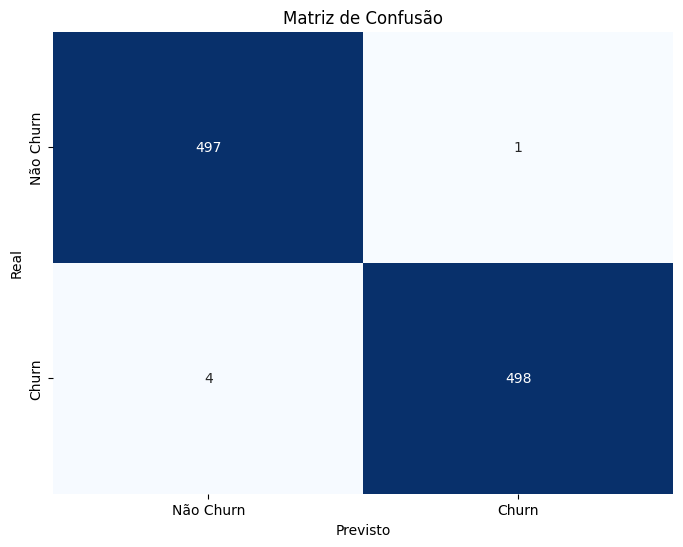


Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       498
           1       1.00      0.99      1.00       502

    accuracy                           0.99      1000
   macro avg       1.00      1.00      0.99      1000
weighted avg       1.00      0.99      1.00      1000



In [56]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Não Churn', 'Churn'], yticklabels=['Não Churn', 'Churn'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

## 5.0. Salvando o Modelo Treinado

In [58]:
# Definir o nome do arquivo para salvar o modelo
model_filename = 'xgb_churn_model.joblib'

# Salvar o modelo treinado em um arquivo
joblib.dump(xgb_model, model_filename)

print(f"Modelo XGBoost salvo com sucesso em '{model_filename}'")

Modelo XGBoost salvo com sucesso em 'xgb_churn_model.joblib'
